In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [9]:
df = pd.read_csv("COVID-19 Coronavirus.csv", encoding='windows-1252')

In [10]:
pd.DataFrame(df.head())

,Country,Other names,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,TotalCases//1M pop,TotalDeaths/1M pop,Death percentage
0,Afghanistan,Afghanistan,AFG,40462186,Asia,177827,7671,4395,190,4.313743
1,Albania,Albania,ALB,2872296,Europe,273870,3492,95349,1216,1.275058
2,Algeria,Algeria,DZA,45236699,Africa,265691,6874,5873,152,2.587216
3,Andorra,Andorra,AND,77481,Europe,40024,153,516565,1975,0.382271
4,Angola,Angola,AGO,34654212,Africa,99194,1900,2862,55,1.915438


In [11]:
print(f'Shape of the dataset is : {df.shape}') 

Shape of the dataset is : (225, 10)


**Each country details are stored in each rows. Hence data here is accumulated for 225 countries**

In [13]:
df.fillna(0)

,Country,Other names,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,TotalCases//1M pop,TotalDeaths/1M pop,Death percentage
0,Afghanistan,Afghanistan,AFG,40462186,Asia,177827,7671,4395,190,4.313743
1,Albania,Albania,ALB,2872296,Europe,273870,3492,95349,1216,1.275058
2,Algeria,Algeria,DZA,45236699,Africa,265691,6874,5873,152,2.587216
3,Andorra,Andorra,AND,77481,Europe,40024,153,516565,1975,0.382271
4,Angola,Angola,AGO,34654212,Africa,99194,1900,2862,55,1.915438
...,...,...,...,...,...,...,...,...,...,...
220,Wallis and Futuna,Wallis and Futuna Islands,WLF,10894,Oceania,454,7,41674,643,1.541850
221,Western Sahara,Western Sahara,ESH??,623031,Africa,10,1,16,2,10.000000
222,Yemen,Yemen,YEM,30975258,Asia,11806,2143,381,69,18.151787
223,Zambia,Zambia,ZMB,19284482,Africa,317076,3967,16442,206,1.251120


In [14]:
df.isna().sum()

Country                    0
Other names                1
ISO 3166-1 alpha-3 CODE    0
Population                 0
Continent                  0
Total Cases                0
Total Deaths               0
TotalCases//1M pop         0
TotalDeaths/1M pop         0
Death percentage           0
dtype: int64

**Other names feature is very much the same as Country. So it would be fine to drop the column**

In [15]:
df=df.drop('Other names', axis=1)

In [16]:
num_features = df.select_dtypes(exclude= 'object').columns.tolist()
cat_features = df.select_dtypes(include= 'object').columns.tolist()


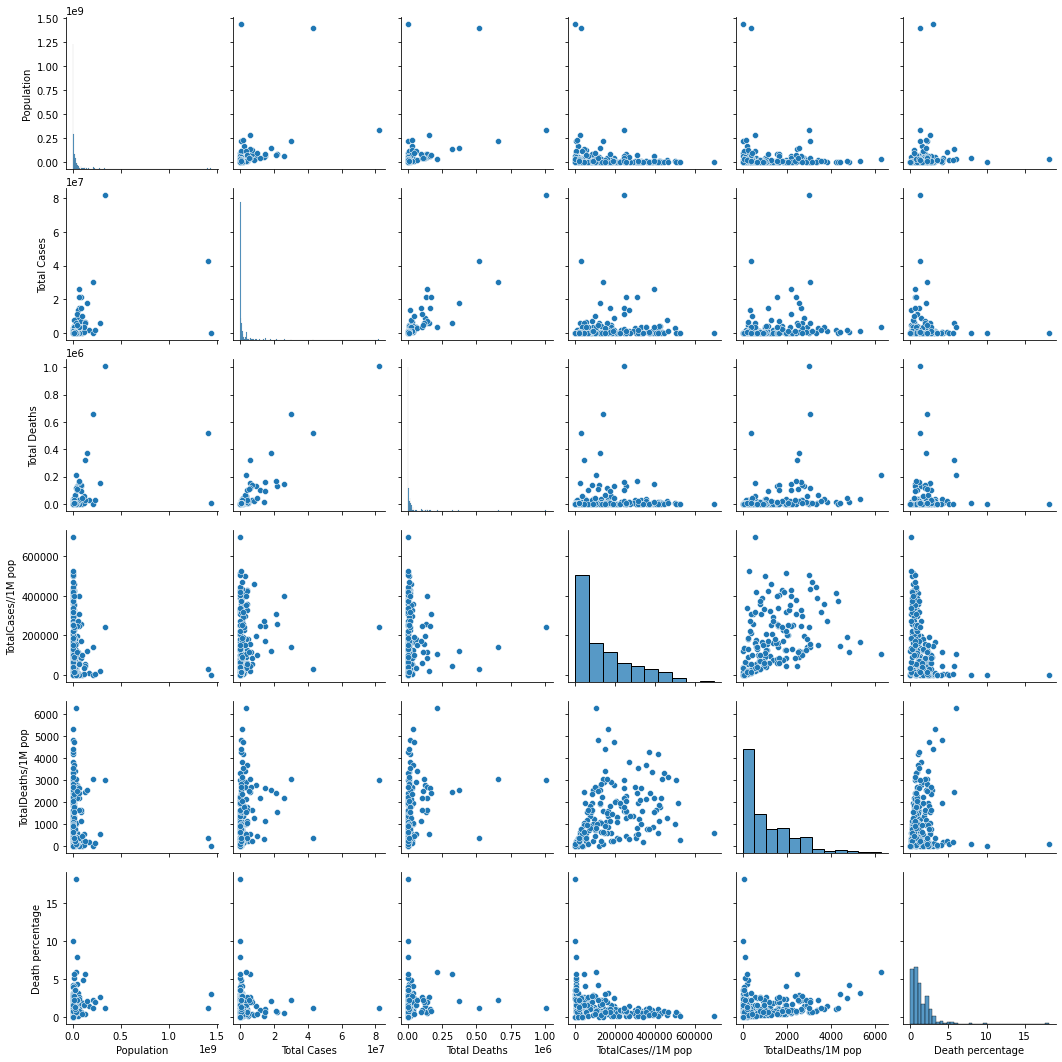

In [17]:
sns.pairplot(df)

**Total Deaths by Continent**

<AxesSubplot:ylabel='Continent'>

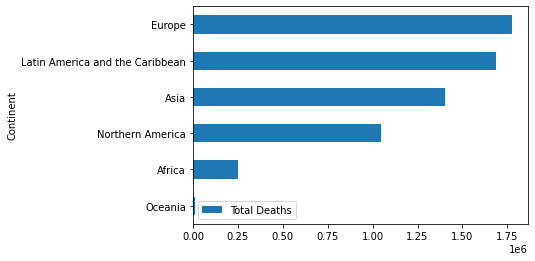

In [18]:
pd.DataFrame(df.groupby('Continent')['Total Deaths'].sum().sort_values()).plot(kind='barh')


**Total Deaths by Country**

<AxesSubplot:ylabel='Country'>

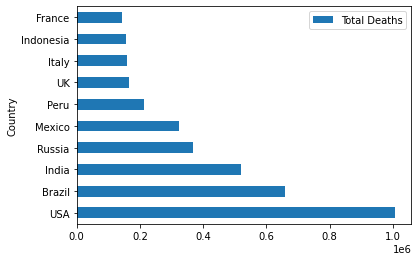

In [19]:
pd.DataFrame(df.groupby('Country')['Total Deaths'].sum().nlargest(10)).plot(kind='barh')


****

**Death Percentage by Continent**

<AxesSubplot:ylabel='Continent'>

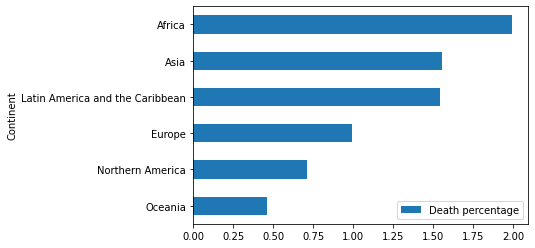

In [20]:
pd.DataFrame(df.groupby('Continent')['Death percentage'].mean().sort_values()).plot(kind='barh')

**Africa, Asia and South America have higher death percentages**

**Top 15 countries with high Death Percentage**

<AxesSubplot:ylabel='Country'>

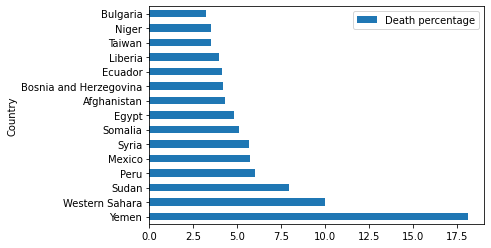

In [21]:
pd.DataFrame(df.groupby('Country')['Death percentage'].mean().nlargest(15)).plot(kind='barh')

**As expected from previous plot, African, South American and Asian Countries have higher death percentage when infected by covid.**

<AxesSubplot:ylabel='Continent'>

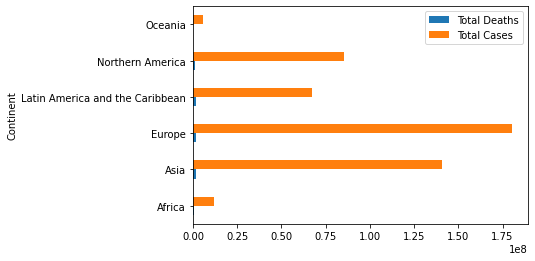

In [22]:
pd.DataFrame(df.groupby('Continent')['Total Deaths','Total Cases'].sum()).plot(kind='barh')


<AxesSubplot:xlabel='Population', ylabel='Total Deaths'>

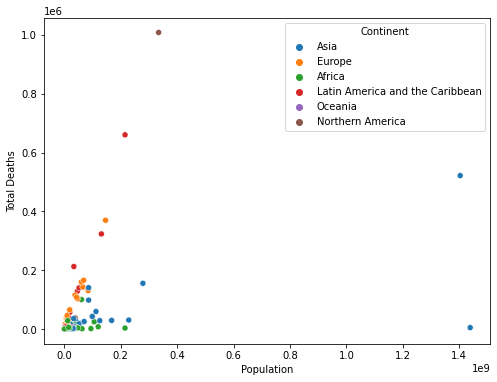

In [23]:
plt.figure(figsize=(8,6))

sns.scatterplot(x=df['Population'], y=df['Total Deaths'], hue=df['Continent'])

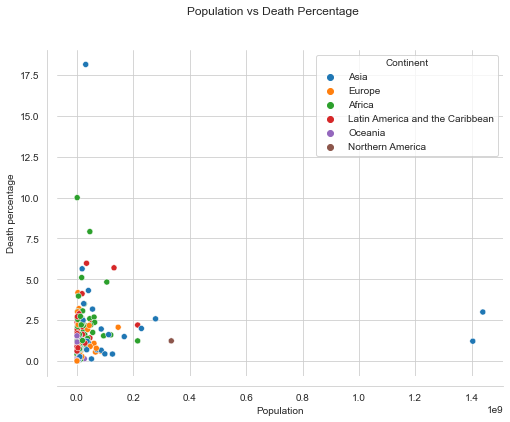

In [24]:
plt.figure(figsize=(8,6))

sns.set_style("whitegrid")

plt.suptitle('Population vs Death Percentage')
sns.scatterplot(x=df['Population'], y=df['Death percentage'], hue=df['Continent'])
sns.despine(offset = 10)


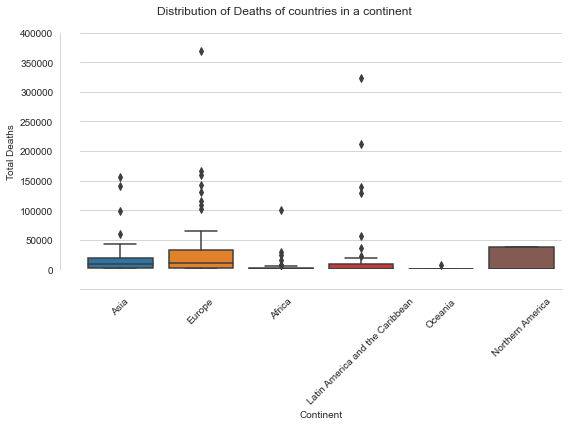

In [25]:
plt.figure(figsize=(8,6))

plt.suptitle('Distribution of Deaths of countries in a continent')
sns.boxplot(x=df['Continent'] , y=df['Total Deaths'])
plt.ylim(0, 0.4e6)
sns.despine(offset = 20)
plt.xticks(rotation=45)
plt.tight_layout()